In [1]:
import uproot
import keras

Using TensorFlow backend.


In [2]:
f = uproot.open("/Users/boldrinicoder/uni/Analisi-Statistica/code/es7/dataset.root")

In [3]:
h = f.get("Signal")
b = f.get("Background")

In [4]:
h.values()

[<TBranch b'x' at 0x000131670f28>, <TBranch b'y' at 0x000131670eb8>]

In [5]:
x_s = h.array("x")
y_s = h.array("y")

x_b = b.array("x")
y_b = b.array("y")

In [85]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 10, 400)
y = np.linspace(-3, 10, 400)
x, y = np.meshgrid(x, y)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


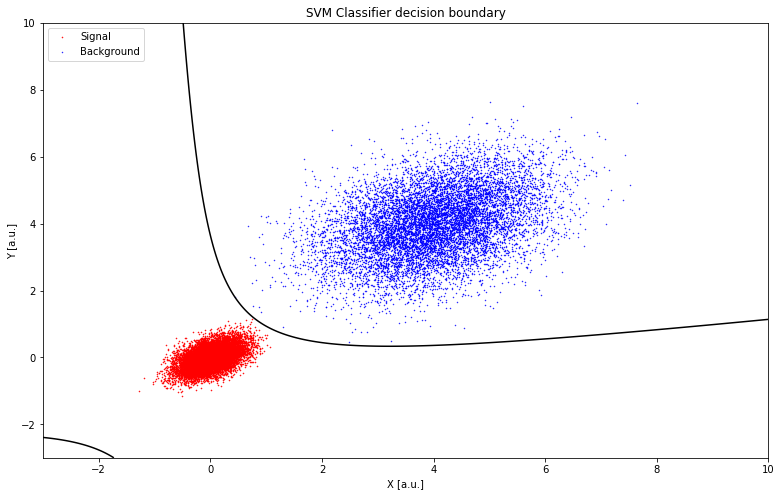

In [7]:
plt.figure(figsize=(13,8))
plt.title("SVM Classifier decision boundary")
plt.xlabel("X [a.u.]")
plt.ylabel("Y [a.u.]")
plt.scatter(x_s,y_s, c = 'red', s=0.3, label="Signal")
plt.scatter(x_b,y_b, c = 'blue', s = 0.2, label = "Background")
plt.contour(x, y, 67.4884 -np.sqrt(2)*19.6457*x -np.sqrt(2)*10.7153*y + 6.03609*x*x -np.sqrt(2)*23.2825*x*y -0.912714*y*y, [0], colors='k', label="SVM Decision boundary")
plt.legend(loc = 'upper left')
plt.savefig("./SVM.pdf")

In [88]:
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [179]:
dataset = []
for i in range(0, 10000):
    dataset.append([x_s[i], y_s[i], 0])
    dataset.append([x_b[i], y_b[i], 1])

In [180]:
scaler = StandardScaler()
dataset = np.array(dataset)

In [181]:
dataset

array([[ 0.10596422,  0.30500808,  0.        ],
       [ 4.89117541,  4.83904158,  1.        ],
       [ 0.22404674, -0.15156598,  0.        ],
       ...,
       [ 3.09241678,  4.00454307,  1.        ],
       [-0.20834193,  0.49262306,  0.        ],
       [ 4.31026368,  3.5734434 ,  1.        ]])

In [182]:
y = dataset[:, 2]
x = dataset[:, :2]
x = StandardScaler().fit_transform(x)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [163]:
model = Sequential()
model.add(Dense(2, input_dim=x_train.shape[1], activation='tanh'))
model.add(Dense(units=5, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, verbose=1, mode='auto', baseline=None)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks= [early_stop])

Train on 16000 samples, validate on 4000 samples
Epoch 1/1000
16000/16000 [==============================] - 1s 53us/sample - loss: 0.3155 - acc: 0.9659 - val_loss: 0.1058 - val_acc: 0.9990
Epoch 2/1000
16000/16000 [==============================] - 1s 35us/sample - loss: 0.0591 - acc: 0.9991 - val_loss: 0.0323 - val_acc: 0.9995
Epoch 3/1000
16000/16000 [==============================] - 1s 40us/sample - loss: 0.0227 - acc: 0.9994 - val_loss: 0.0157 - val_acc: 0.9995
Epoch 4/1000
16000/16000 [==============================] - 1s 35us/sample - loss: 0.0122 - acc: 0.9996 - val_loss: 0.0095 - val_acc: 0.9995
Epoch 5/1000
16000/16000 [==============================] - 1s 36us/sample - loss: 0.0077 - acc: 0.9997 - val_loss: 0.0064 - val_acc: 0.9995
Epoch 6/1000
16000/16000 [==============================] - 1s 35us/sample - loss: 0.0053 - acc: 0.9998 - val_loss: 0.0046 - val_acc: 0.9998
Epoch 7/1000
16000/16000 [==============================] - 1s 35us/sample - loss: 0.0038 - acc: 0.9998 -

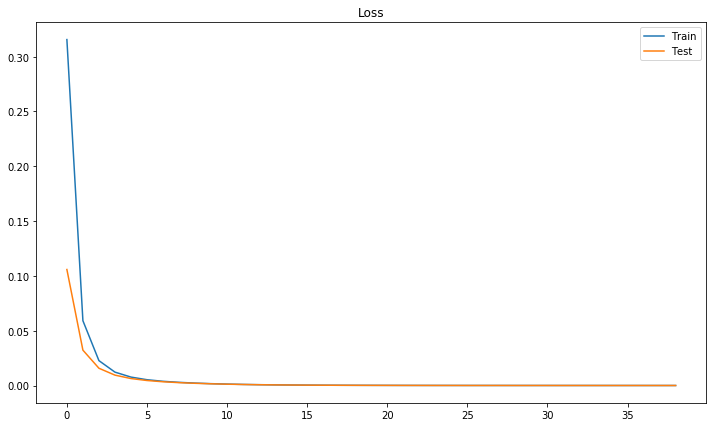

In [172]:
fig = plt.figure(figsize=(12,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()
fig.savefig("./NN_train.pdf")

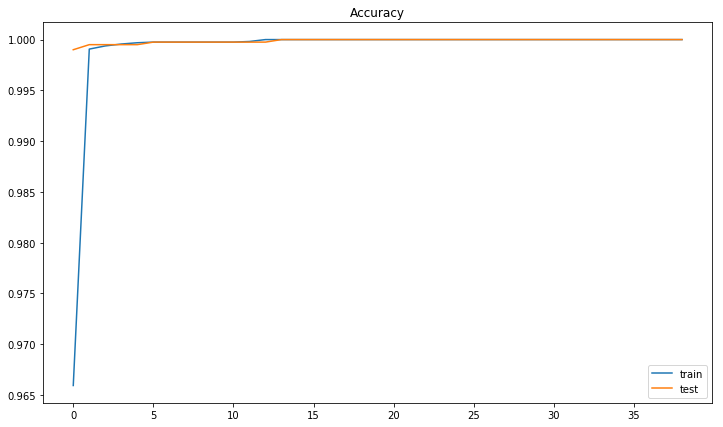

In [171]:
fig = plt.figure(figsize=(12,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()
fig.savefig("./NN_acc.pdf")

In [166]:
y_pred_proba = model.predict(x_test)
y_pred = []
for pred_score in y_pred_proba:
    y_pred.append(round(pred_score[0]))

In [178]:
x1 = np.linspace(-2, 3, 50)
y1 = np.linspace(-2, 3, 50)
xx, yy = np.meshgrid(x, y)

In [168]:
labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = labels.reshape(xx.shape)

In [169]:
x_signal = []
x_back = []

for i in range(0, x_test.shape[0]):
    if(y_test[i] == 0):
        x_signal.append(x_test[i])
    else:
        x_back.append(x_test[i])
        
x_signal = np.array(x_signal)
x_back = np.array(x_back)

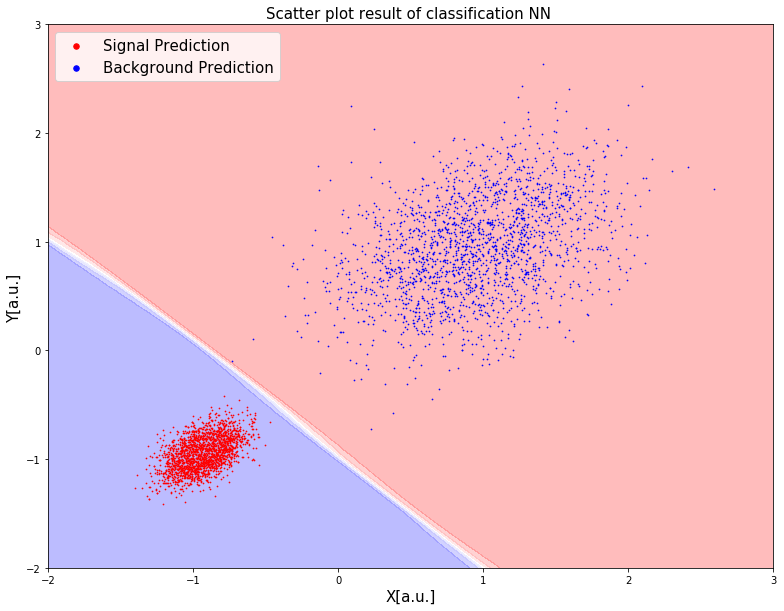

In [170]:
fig = plt.figure(figsize=(13,10))
plt.contourf(xx, yy, z, cmap='bwr', alpha=0.3)
plt.scatter(x_signal[:,0], x_signal[:,1], c="red" , s =0.5, label = 'Signal Prediction')
plt.scatter(x_back[:,0], x_back[:,1], c="blue" , s =0.5, label = 'Background Prediction')
plt.xlabel('X[a.u.]', fontsize=15)
plt.ylabel('Y[a.u.]', fontsize=15)
plt.title('Scatter plot result of classification NN ', fontsize=15)
legend = plt.legend(loc = 'upper left', fontsize=15)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

fig.savefig("./MLP_class.pdf")

In [183]:
x_signal = []
x_back = []

for i in range(0, y.shape[0]):
    if(y[i] == 0):
        x_signal.append(x[i])
    else:
        x_back.append(x[i])
        
x_signal = np.array(x_signal)
x_back = np.array(x_back)

In [184]:
x_signal

array([[-0.88786735, -0.79379795],
       [-0.8324649 , -1.00758958],
       [-0.98140681, -1.07802211],
       ...,
       [-0.80827851, -0.75890893],
       [-0.7672948 , -1.11435551],
       [-1.03533481, -0.7059469 ]])

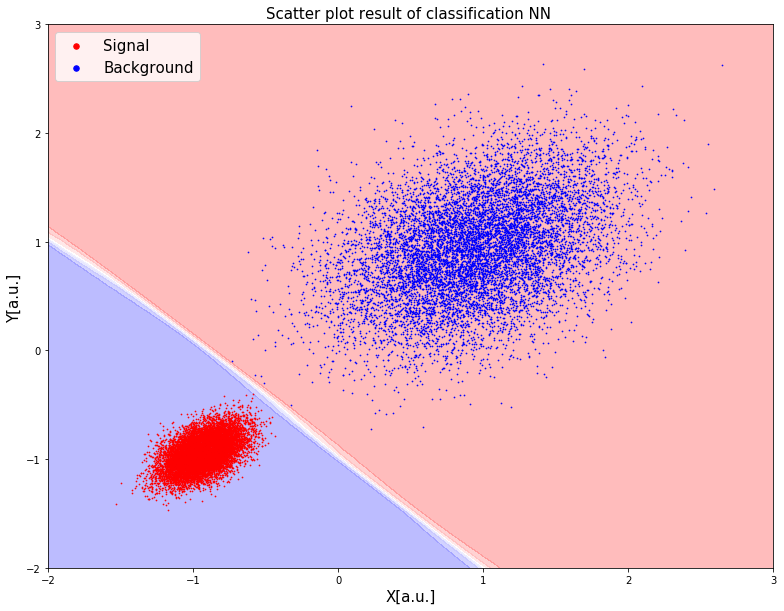

In [185]:
fig = plt.figure(figsize=(13,10))
plt.contourf(xx, yy, z, cmap='bwr', alpha=0.3)
plt.scatter(x_signal[:,0], x_signal[:,1], c="red" , s =0.5, label = 'Signal')
plt.scatter(x_back[:,0], x_back[:,1], c="blue" , s =0.5, label = 'Background')
plt.xlabel('X[a.u.]', fontsize=15)
plt.ylabel('Y[a.u.]', fontsize=15)
plt.title('Scatter plot result of classification NN ', fontsize=15)
legend = plt.legend(loc = 'upper left', fontsize=15)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

fig.savefig("./MLP_class_train.pdf")

In [394]:
import numpy as np
import matplotlib.pyplot as plt

In [411]:
mu, sigma = 0, 0.003
s = np.random.normal(mu, sigma, 10000)
print(max(s))
delta_t = ((max(s)-min(s))/100)/0.1
print(delta_t)

0.011685768956251888
0.0022193146558083104


6


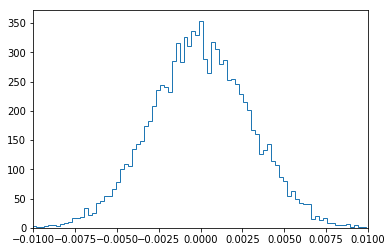

In [399]:
ax = plt.hist(s, bins=100, histtype="step")
plt.xlim(-0.01, 0.01)


In [403]:
smear = []
for i in range(0, len(s)):
    smear.append(s[i]-np.random.normal(0, 0.01))
    #smear.append(s[i])

delta_t = int((max(smear)-min(smear))
bine = int((max(s)-min(s))/100)

In [404]:
print(bine, bine1)

4 15


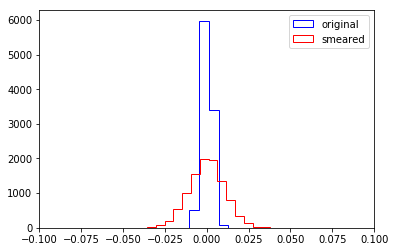

In [405]:
n,bins,patches = plt.hist(s, bins=bine, histtype="step", color='blue', label='original')
n1, _,_ = plt.hist(smear, bins=bine1, histtype="step", color='red', label='smeared')
plt.xlim(-0.1, 0.1)
plt.legend(loc = "upper right")

In [367]:
sum(n)

1000.0

In [368]:
sum(n1)

1000.0

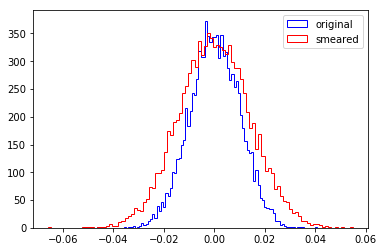

In [69]:
values, bins, _ = plt.hist(s, bins=100, histtype="step", color='blue', label='original')
values_s, bins_s, _ = plt.hist(smear, bins=100, histtype="step", color='red', label='smeared')
plt.legend(loc = "upper right")

In [71]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

In [437]:
mu, sigma = 0, 0.003
s = np.random.normal(mu, sigma, 10000)

bin_w = (0.01+0.01)/100
st = .9*bin_w

smear = []
for i in range(0, len(s)):
    smear.append(s[i]-np.random.normal(0, st))

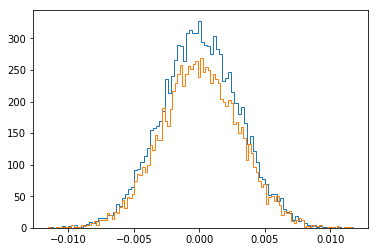

In [440]:
_,_,_=plt.hist(s, bins = 100, histtype='step')
_,_,_ = plt.hist(smear, bins = 120, histtype='step')